# Test Results

## Imports

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from utils.metrics import display_clasification_metrics, get_metrics

import sklearn.metrics
import torch
import sklearn
from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt

## Recurential Neural Networks

### LSTM

In [2]:
df = pd.read_csv("results/basic_tweet_sentiment_lstm_2.csv")
print(df.describe())

       train_targets   train_preds  validation_targets  validation_preds  \
count   1.440000e+06  1.440000e+06       160000.000000     160000.000000   
mean    2.000917e+00  1.954958e+00            1.991750          1.931550   
std     2.000000e+00  1.999493e+00            1.999989          1.998835   
min     0.000000e+00  0.000000e+00            0.000000          0.000000   
25%     0.000000e+00  0.000000e+00            0.000000          0.000000   
50%     4.000000e+00  0.000000e+00            0.000000          0.000000   
75%     4.000000e+00  4.000000e+00            4.000000          4.000000   
max     4.000000e+00  4.000000e+00            4.000000          4.000000   

       test_targets  test_preds  
count    498.000000  498.000000  
mean       2.020080    2.417671  
std        1.699686    1.957868  
min        0.000000    0.000000  
25%        0.000000    0.000000  
50%        2.000000    4.000000  
75%        4.000000    4.000000  
max        4.000000    4.000000  


Train set metrics
F1 Score 0.8468150428450141
Accuracy 0.8468479166666667
Recall 0.8468472470191293

Validation set metrics
F1 Score 0.7806707520235517
Accuracy 0.78075625
Recall 0.780764527148839

Test set metrics
F1 Score 0.44963772113722467
Accuracy 0.5763052208835341
Recall 0.5326773038637446


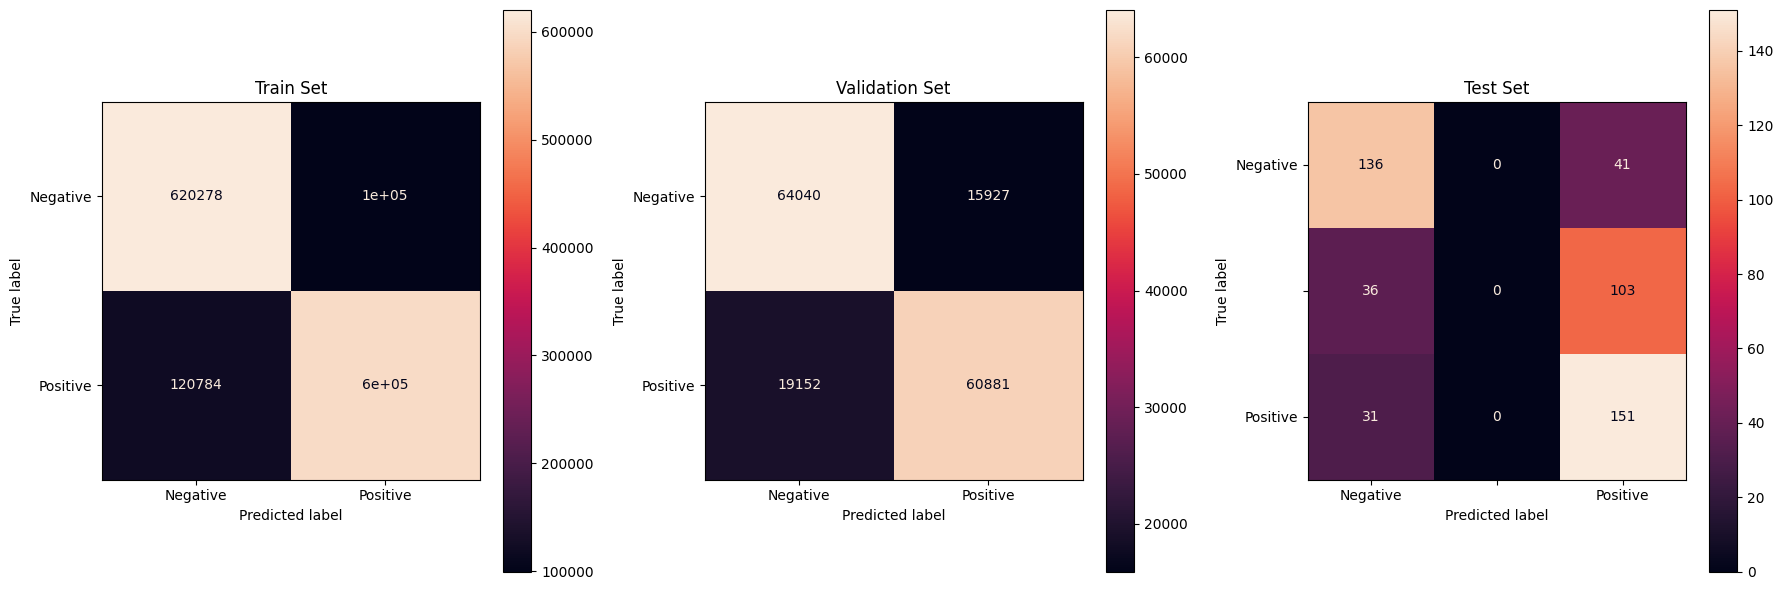

In [33]:
df = pd.read_csv("results/basic_tweet_sentiment_gru.csv")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

print("Train set metrics")
train_target, train_train_preds = df["train_targets"].dropna().values, df["train_preds"].dropna().values
validation_targets, validation_preds = df["validation_targets"].dropna().values, df["validation_preds"].dropna().values
test_targets, test_preds = df["test_targets"].dropna().values, df["test_preds"].dropna().values

# confusion_matrix_labels = np.unique(df["train_targets"].values)
confusion_matrix_labels = ["Negative", "Positive"]
display_clasification_metrics(torch.tensor(train_train_preds), torch.tensor(train_target), confusion_matrix_labels, ax=axs[0])
axs[0].set_title('Train Set')

print("\nValidation set metrics")
display_clasification_metrics(torch.tensor(validation_preds), torch.tensor(validation_targets), confusion_matrix_labels, ax=axs[1])
axs[1].set_title('Validation Set')

print("\nTest set metrics")
confusion_matrix_labels = ["Negative", "", "Positive"]
display_clasification_metrics(torch.tensor(test_preds), torch.tensor(test_targets), confusion_matrix_labels, ax=axs[2])
axs[2].set_title('Test Set')

plt.tight_layout()
plt.show()
